## Test read of NOAA EBAS Nephelometer data file from Betsy

In [1]:
import pyaerocom as pya

Init data paths for lustre


0.009107589721679688 s


In [2]:
filename = 'US0035R.20100101000000.20190131170718.aerosol_light_scattering_coefficient.pm10.1y.1h.lev2.nas'

### Read NASA Ames file

In [72]:
data = pya.io.EbasNasaAmesFile(filename)

Betsy, does everything below look right?

In [73]:
print(data)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 91
   num_head_fmt: 1001
   data_originator: Sheridan, Patrick
   sponsor_organisation: US06L, National Oceanic and Atmospheric Administration/Earth System Research Laboratory/Global Monitoring Division, NOAA/ESRL/GMD, , 325 Broadway, , 80305, "Boulder, CO", USA
   submitter: Sheridan, Patrick
   project_association: GAW-WDCA NOAA-ESRL
   vol_num: 1
   vol_totnum: 1
   ref_date: 2010-01-01T00:00:00
   revision_date: 2019-01-31T00:00:00
   freq: 0.041667
   descr_time_unit: Days from the file reference point (start_time)
   num_cols_dependent: 25
   mul_factors (list, 25 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 25 items)
   [9999.999999
    9999.0
    ...
    9999.99
    9.999999999999998]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=start_time, unit=Days, is_var

In [74]:
df_scat = data.to_dataframe(var_name='aerosol_light_scattering_coefficient')
df_scat

,aerosol_light_scattering_coefficient_1/Mm_450.0nm,aerosol_light_scattering_coefficient_1/Mm_550.0nm,aerosol_light_scattering_coefficient_1/Mm_700.0nm,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:84.13
2010-01-01 00:30:00,74.04,53.33,35.06,73.05,52.80,34.66,76.09,54.17,35.57
2010-01-01 01:29:59,61.89,45.13,29.97,58.11,42.17,27.85,66.66,48.81,31.82
2010-01-01 02:29:59,50.32,36.48,24.55,48.09,35.18,23.57,52.72,37.95,25.38
2010-01-01 03:30:00,46.95,34.85,23.03,45.79,34.21,22.08,48.15,35.64,23.92
2010-01-01 04:29:59,50.54,37.62,25.54,49.54,36.87,25.07,51.13,38.20,26.23
2010-01-01 05:29:59,53.93,39.83,26.61,52.92,39.19,26.22,54.65,40.32,26.95
2010-01-01 06:30:00,55.66,40.46,26.97,54.65,40.01,26.72,56.51,40.93,27.22
2010-01-01 07:29:59,54.56,39.61,26.19,53.92,39.14,25.83,55.49,40.55,26.61
2010-01-01 08:29:59,54.60,39.71,26.19,53.45,39.03,25.81,55.46,40.28,26.65
2010-01-01 09:30:00,51.81,37.59,24.75,50.99,36.87,24.31,52.90,38.28,25.08


### Plot scattering coefficient data at all wavelengths

Text(0.5, 1.0, 'Scattering all wavelengths')

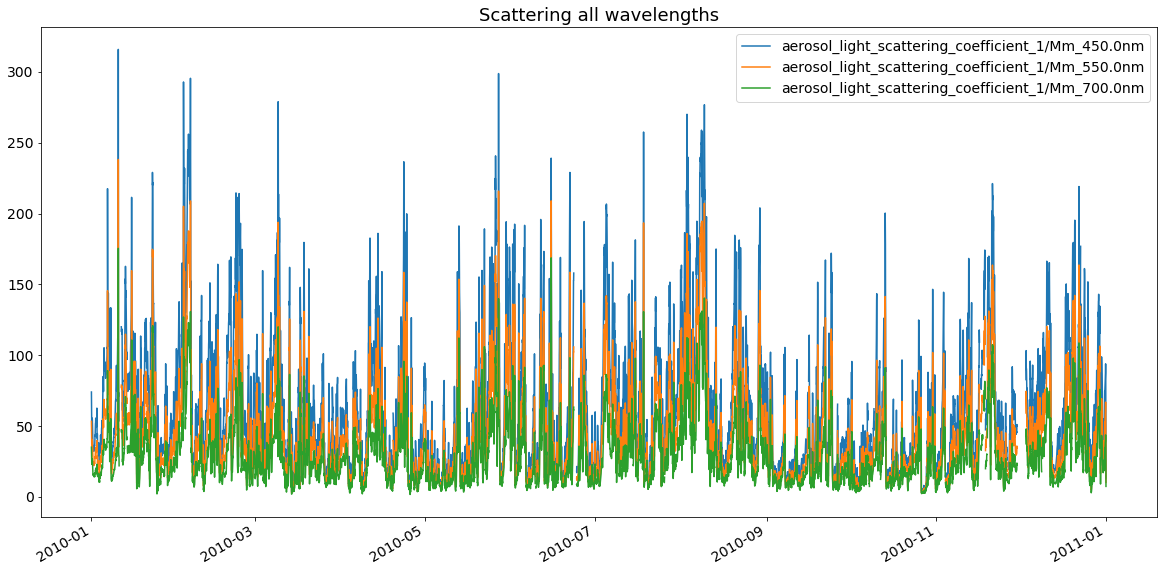

In [91]:
ax = df_scat['aerosol_light_scattering_coefficient_1/Mm_450.0nm'].plot(figsize=(20, 10))
df_scat['aerosol_light_scattering_coefficient_1/Mm_550.0nm'].plot()
df_scat['aerosol_light_scattering_coefficient_1/Mm_700.0nm'].plot()
ax.legend()
ax.set_title('Scattering all wavelengths')

#### Relative humidity (left axis)

Text(0.5, 1.0, 'Relative humidity')

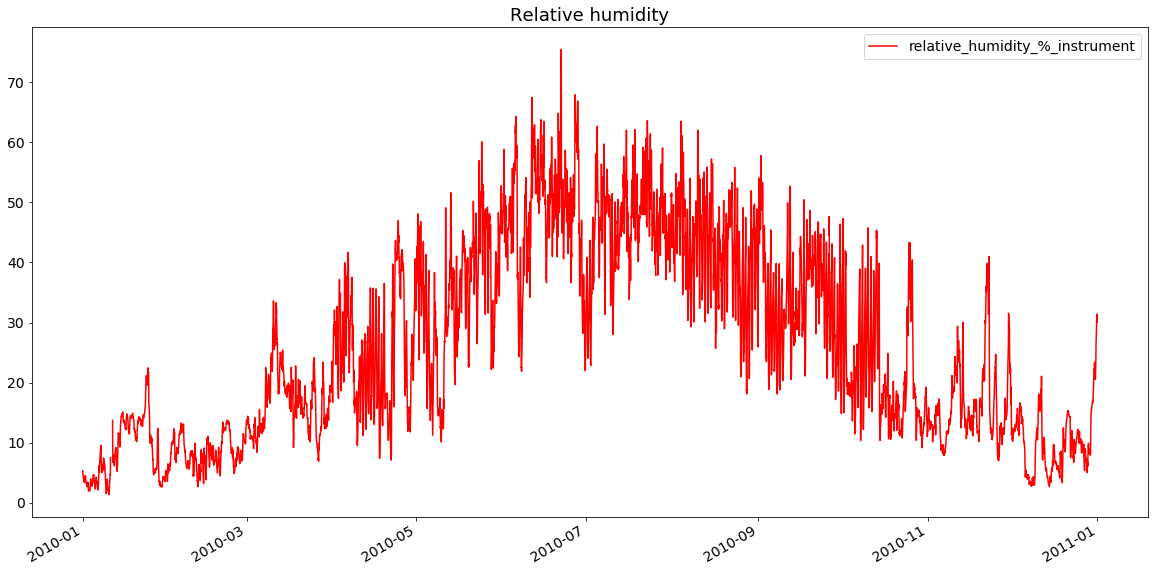

In [90]:
rh_df = data.to_dataframe(var_name='relative_humidity')

ax = rh_df.plot(style='r-', figsize=(20, 10))
ax.set_title('Relative humidity')

#### Plot scattering only at valid flags and where RH<50%

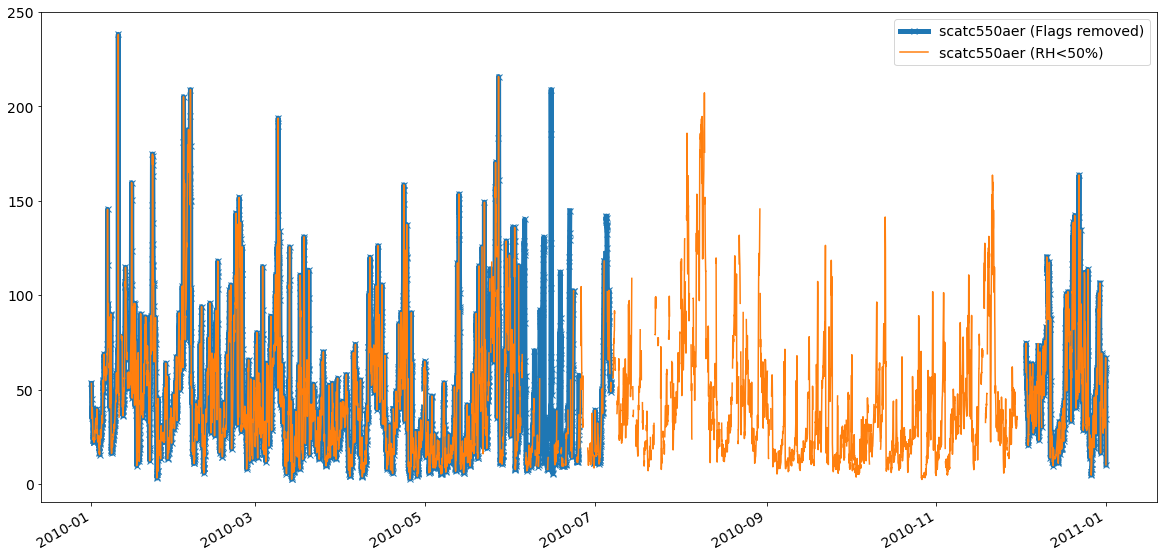

In [89]:
import numpy as np
import pandas as pd
from copy import deepcopy
# mask specifying invalid measurements
invalid = ~data.flag_col_info[25].valid

# the original scattering data
scatc550aer = df_scat['aerosol_light_scattering_coefficient_1/Mm_550.0nm']

# Data where invalid flags are removed
scatc550aer_V = deepcopy(scatc550aer)
scatc550aer_V[invalid] = np.nan

scatc550dryaer = deepcopy(scatc550aer)
rhmask = rh_df['relative_humidity_%_instrument'] > 50
scatc550dryaer[rhmask] = np.nan

ax = scatc550aer_V.plot(figsize=(20, 10), label='scatc550aer (Flags removed)', style='-x', lw=5)
scatc550dryaer.plot(style='-', label='scatc550aer (RH<50%)')
ax.legend()
ax.set_title('Scattering 550 nm ()')